<a href="https://colab.research.google.com/github/brendanpshea/programming_problem_solving/blob/main/Java_05_RobustData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Robust Code and Complex Data
## *May the Types Be With You*
**Brendan Shea, PhD**

---

### Learning Objectives

By the end of this chapter, you will be able to:

1. **Use** Java packages and `import` statements to access library classes
2. **Perform** type casting (widening and narrowing) and round numbers correctly
3. **Identify** and prevent integer overflow errors
4. **Explain** wrapper classes, autoboxing, and unboxing
5. **Handle** `null` values and avoid `NullPointerException`
6. **Distinguish** between null, empty, and blank strings
7. **Validate** user input using loops and `Scanner` methods
8. **Iterate** over arrays using the enhanced for loop (for-each)
9. **Create** and manipulate two-dimensional arrays

## Introduction: Building Code That Doesn't Blow Up

In the *Star Wars* universe, droids like R2-D2 are built to handle anything—blaster fire, swamp water, even being swallowed by a monster. They're **robust**. A fragile droid that crashes every time something unexpected happens wouldn't last five minutes on Tatooine.

So far in this course, your Java programs have worked under ideal conditions—you've entered the right types of input, stayed within the bounds of your arrays, and generally been nice to your code. But in the real world, things go wrong. Users type "hello" when you ask for a number. Values overflow their containers. Variables point to nothing at all.

This chapter is about building **robust code**—programs that handle the unexpected gracefully instead of crashing. We'll also introduce some powerful new tools: wrapper classes for bridging the gap between primitive types and objects, enhanced for loops for cleaner iteration, and two-dimensional arrays for working with grid-like data.

Think of it this way: you already know how to build a lightsaber. Now it's time to build one that won't explode in your hand.

> **The Robustness Principle:** Good programs don't just work when everything goes right—they handle what happens when things go *wrong*.

## 5.1 Java Packages and Imports

Imagine trying to find a single tool on a massive starship like a Star Destroyer without any organization. Thousands of rooms, millions of components, and no labeling system—it would be chaos. That's why starships are organized into sections: the bridge, engineering, the hangar bay, the medical ward, and so on. Each section groups related equipment together so crew members can find what they need.

Java works the same way. The Java Standard Library contains **thousands** of classes, and they're organized into **packages**—named groups of related classes. When you want to use a class, you tell Java which package to find it in, just like telling a crew member which section of the ship to go to.

### Common Java Packages

| Package | What It Contains | Example Classes |
|---------|------------------|-----------------|
| `java.lang` | Core language classes (auto-imported!) | `String`, `Math`, `Integer`, `System` |
| `java.util` | Utility classes and data structures | `Scanner`, `Arrays`, `Random`, `ArrayList` |
| `java.io` | Input/output and file handling | `File`, `FileReader`, `BufferedReader` |
| `java.math` | High-precision math | `BigDecimal`, `BigInteger` |
| `java.time` | Date and time | `LocalDate`, `LocalTime`, `Duration` |

Notice that `java.lang` is **auto-imported**—you never need to write an import statement for classes like `String`, `Math`, or `System`. That's why you've been using `System.out.println()` all along without importing anything! Every other package, though, requires an explicit import.

### The `import` Statement

To use a class from a package other than `java.lang`, you place an `import` statement at the **top** of your file (before the class definition). There are two forms.

**Import a specific class** (recommended):

```java
import java.util.Scanner;   // Just the Scanner class
import java.util.Random;    // Just the Random class
```

**Import all classes in a package** (wildcard):

```java
import java.util.*;   // Every class in java.util
```

An important clarification: the `import` statement doesn't actually *load* anything into memory. It simply tells the compiler, "When I write `Scanner`, I mean `java.util.Scanner`." Think of it like a droid translator: when you say "Scanner," the import tells Java which Scanner you're referring to (since classes in different packages can share names).

Here's a typical file structure:

```java
import java.util.Scanner;  // imports go first
import java.util.Random;

public class MyProgram {   // then the class
    public static void main(String[] args) {
        Scanner input = new Scanner(System.in);
        Random rand = new Random();
        // ... rest of your code
    }
}
```

If you forget to import a class, the compiler will give you an error like: `error: cannot find symbol`. This almost always means you need to add an import statement.

### Static Imports (Optional Shortcut)

You've been writing `Math.sqrt()` and `Math.PI` with the class name `Math` in front. Java offers a **static import** that lets you use these directly:

```java
import static java.lang.Math.*;  // static import

// Now you can write:
double result = sqrt(25);    // instead of Math.sqrt(25)
double area = PI * r * r;    // instead of Math.PI * r * r
```

Static imports can make code shorter, but they can also make it less clear where a method comes from. For beginners, it's usually better to keep the class name (like `Math.sqrt()`) for clarity. You'll see static imports used occasionally in other people's code, so it's good to know they exist.

### Graphic: Java Package Heirarchy

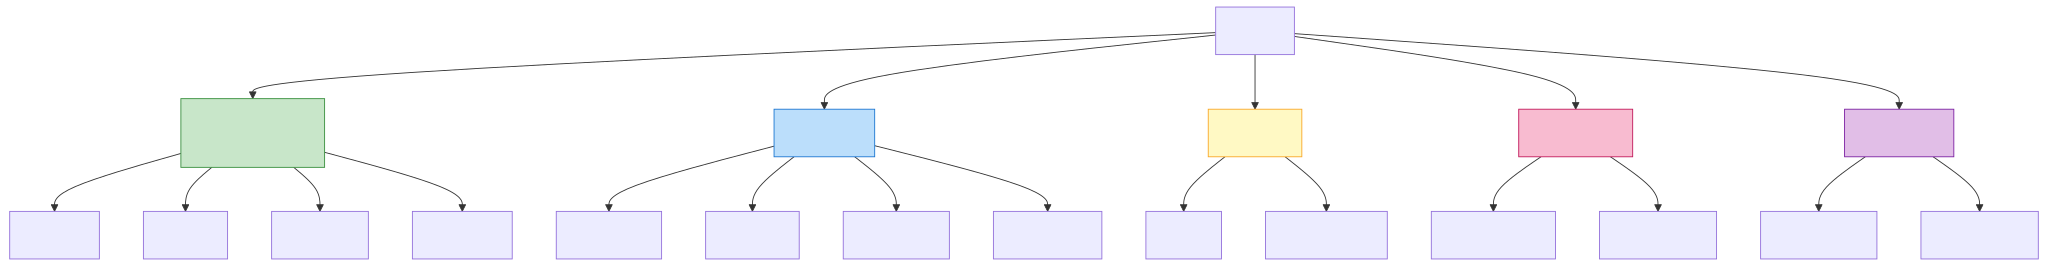

In [ ]:
# @title
import base64
import requests
import json
from IPython.display import SVG, display

def mm(graph: str, width: str = "100%") -> None:
    """
    Fetch and display a Mermaid diagram with optional scaling.

    Parameters:
      graph (str): Mermaid graph definition.
      width (str): CSS width for the SVG (e.g., "100%", "800px").
                   Defaults to "75%" (full cell width).
    """
    # 1. Configuration to fix font clipping
    graph_data = {
        "code": graph,
        "mermaid": {
            "theme": "default",
            "themeVariables": {
                "fontFamily": "arial"
            }
        }
    }

    # 2. Encode
    json_str = json.dumps(graph_data)
    b64 = base64.urlsafe_b64encode(json_str.encode('utf-8')).decode('ascii')

    # 3. Fetch
    url = f'https://mermaid.ink/svg/{b64}'
    response = requests.get(url)

    if response.status_code == 200:
        display(SVG(data=response.text), metadata={"width": width})
    else:
        print(f"Error: {response.status_code}")

mm("""
graph TD
    JAVA["java"] --> LANG["java.lang<br/><i>auto-imported!</i>"]
    JAVA --> UTIL["java.util"]
    JAVA --> IO["java.io"]
    JAVA --> MATH["java.math"]
    JAVA --> TIME["java.time"]

    LANG --> String["String"]
    LANG --> MathC["Math"]
    LANG --> Integer["Integer"]
    LANG --> SystemC["System"]

    UTIL --> Scanner["Scanner"]
    UTIL --> Arrays["Arrays"]
    UTIL --> Random["Random"]
    UTIL --> ArrayList["ArrayList"]

    IO --> File["File"]
    IO --> FileReader["FileReader"]

    MATH --> BigDecimal["BigDecimal"]
    MATH --> BigInteger["BigInteger"]

    TIME --> LocalDate["LocalDate"]
    TIME --> LocalTime["LocalTime"]

    style LANG fill:#c8e6c9,stroke:#388e3c
    style UTIL fill:#bbdefb,stroke:#1976d2
    style IO fill:#fff9c4,stroke:#f9a825
    style MATH fill:#f8bbd0,stroke:#c2185b
    style TIME fill:#e1bee7,stroke:#7b1fa2""")

## 5.2 Casting and Rounding

In Java, every value has a type, and sometimes you need to convert a value from one type to another. Maybe you have a `double` but need an `int`, or you're doing math with mixed types. This process is called **casting** (or **type conversion**), and getting it wrong is a common source of bugs.

### Implicit Casting (Widening)

When you assign a smaller type to a larger type, Java handles the conversion automatically. This is called **widening** or **implicit casting** because no information is lost—you're just putting a small value into a bigger container.

```java
int midiChlorians = 20000;
double midiAsDouble = midiChlorians;  // Automatic: int → double
System.out.println(midiAsDouble);     // Prints: 20000.0
```

Think of it like loading a small droid (R2-D2) into a large cargo bay. It fits easily—nothing gets left behind. Java performs widening conversions along this path:

```
byte → short → int → long → float → double
```

Any conversion that moves to the **right** in this sequence happens automatically. Some examples:

```java
byte small = 42;
int bigger = small;       // byte → int (automatic)
long evenBigger = bigger; // int → long (automatic)
double biggest = evenBigger; // long → double (automatic)
```

This also happens automatically in expressions with mixed types. If you add an `int` and a `double`, Java widens the `int` to a `double` before doing the math:

```java
int credits = 100;
double taxRate = 0.08;
double total = credits * taxRate;  // credits becomes 100.0, then multiplied
```

### Explicit Casting (Narrowing)

Going the other direction—from a larger type to a smaller one—requires you to explicitly tell Java "I know this might lose information, do it anyway." This is called **narrowing** or **explicit casting**.

You perform a narrowing cast by putting the target type in parentheses before the value:

```java
double preciseDistance = 12.7;
int roundedDown = (int) preciseDistance;  // Explicit cast: double → int
System.out.println(roundedDown);          // Prints: 12  (NOT 13!)
```

**This is critical:** casting to `int` does not round—it **truncates** (chops off the decimal part). It always rounds toward zero, no matter how close the decimal is to the next number:

| Expression | Result | Why |
|------------|--------|-----|
| `(int) 3.1` | `3` | Decimal part removed |
| `(int) 3.9` | `3` | Still truncated, NOT rounded to 4 |
| `(int) 3.999` | `3` | Truncation ignores how close to 4 it is |
| `(int) -2.7` | `-2` | Rounds toward zero (not toward -3) |

Think of it like trying to squeeze Chewbacca into an X-Wing cockpit—something's going to get cut off. Casting doesn't make a judgment about what *should* happen; it just chops.

If you try to narrow without a cast, the compiler will stop you:

```java
double price = 19.99;
int wholePrice = price;  // ERROR: possible lossy conversion from double to int
```

Java is protecting you here. The explicit cast `(int)` is your way of saying "I understand data might be lost."

### Rounding Properly

Since casting truncates rather than rounds, you need dedicated methods when you want proper rounding. Java's `Math` class (from `java.lang`, so no import needed) provides three options:

| Method | What It Does | Example | Result |
|--------|-------------|---------|--------|
| `Math.round()` | Rounds to nearest integer (returns `long`) | `Math.round(3.5)` | `4` |
| `Math.floor()` | Rounds **down** to nearest integer (returns `double`) | `Math.floor(3.9)` | `3.0` |
| `Math.ceil()` | Rounds **up** to nearest integer (returns `double`) | `Math.ceil(3.1)` | `4.0` |

Let's see all three in action with the same value:

```java
double distance = 14.6; // parsecs

long rounded = Math.round(distance);    // 15
double floored = Math.floor(distance);  // 14.0
double ceiled = Math.ceil(distance);    // 15.0
int truncated = (int) distance;         // 14 (just chops the .6)
```

Notice that `Math.round()` returns a `long`, not an `int`. If you need an `int`, you'll have to cast:

```java
int rounded = (int) Math.round(14.6);  // Safe: 15 fits in an int
```

**A common pattern for rounding to decimal places:** To round to, say, 2 decimal places, multiply by 100, round, then divide by 100:

```java
double price = 19.876;
double rounded = Math.round(price * 100.0) / 100.0;  // 19.88
```

### Graphic: Implicit vs Explicit Casting

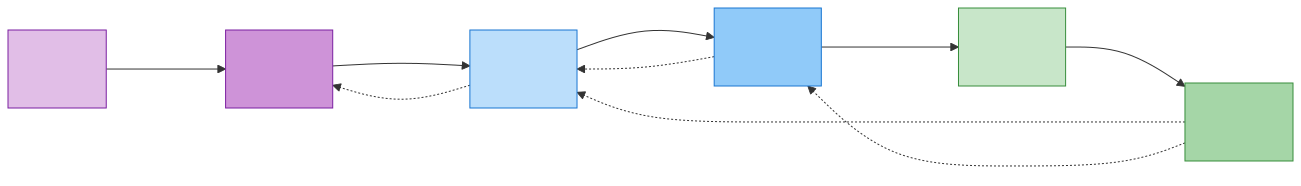

In [ ]:
# @title
mm("""
graph LR
    BYTE["byte<br/><i>8 bits</i>"] -->|automatic| SHORT["short<br/><i>16 bits</i>"]
    SHORT -->|automatic| INT["int<br/><i>32 bits</i>"]
    INT -->|automatic| LONG["long<br/><i>64 bits</i>"]
    LONG -->|automatic| FLOAT["float<br/><i>32 bits</i>"]
    FLOAT -->|automatic| DOUBLE["double<br/><i>64 bits</i>"]

    DOUBLE -.->|"cast needed<br/>(int) x"| INT
    LONG -.->|"cast needed"| INT
    DOUBLE -.->|"cast needed"| LONG
    INT -.->|"cast needed"| SHORT

    style BYTE fill:#e1bee7,stroke:#7b1fa2
    style SHORT fill:#ce93d8,stroke:#7b1fa2
    style INT fill:#bbdefb,stroke:#1976d2
    style LONG fill:#90caf9,stroke:#1976d2
    style FLOAT fill:#c8e6c9,stroke:#388e3c
    style DOUBLE fill:#a5d6a7,stroke:#388e3c""")

### 🚀 Program 1: Galactic Unit Converter

The following program converts distances between different units used in space travel. It demonstrates widening casts, narrowing casts, and proper rounding. The program asks the user for a distance in light-years and converts it to parsecs and astronomical units (AU), showing how different conversion methods produce different results.

Note: In real astronomy, 1 light-year ≈ 0.3066 parsecs and 1 light-year ≈ 63,241 AU. We'll use these (approximate) conversion factors.

In [ ]:
%%writefile GalacticConverter.java
import java.util.Scanner;

public class GalacticConverter {
    public static void main(String[] args) {
        Scanner scanner = new Scanner(System.in);

        // Conversion constants
        double PARSECS_PER_LY = 0.3066;
        double AU_PER_LY = 63241.0;

        System.out.println("=== Galactic Unit Converter ===");
        System.out.print("Enter distance in light-years: ");
        double lightYears = scanner.nextDouble();

        // Widening cast happens automatically: int constant used in double expression
        double parsecs = lightYears * PARSECS_PER_LY;
        double au = lightYears * AU_PER_LY;

        // Different ways to convert double to int
        int truncatedAU = (int) au;                      // Narrowing cast (truncates)
        int roundedAU = (int) Math.round(au);            // Proper rounding
        int flooredAU = (int) Math.floor(au);            // Always rounds down
        int ceiledAU = (int) Math.ceil(au);              // Always rounds up

        // Round parsecs to 4 decimal places for display
        double parsecRounded = Math.round(parsecs * 10000.0) / 10000.0;

        System.out.println();
        System.out.println("--- Conversion Results ---");
        System.out.println(lightYears + " light-years = " + parsecRounded + " parsecs");
        System.out.println();
        System.out.println("In Astronomical Units (AU):");
        System.out.println("  Exact:      " + au);
        System.out.println("  Truncated:  " + truncatedAU + " (int cast - chops decimal)");
        System.out.println("  Rounded:    " + roundedAU + " (Math.round - nearest whole)");
        System.out.println("  Floored:    " + flooredAU + " (Math.floor - always down)");
        System.out.println("  Ceiled:     " + ceiledAU + " (Math.ceil - always up)");

        // Demonstrate widening in mixed arithmetic
        int sectorCount = 5;
        double auPerSector = au / sectorCount;  // int widened to double automatically
        System.out.println();
        System.out.println("If divided among " + sectorCount + " sectors: "
                           + Math.round(auPerSector * 100.0) / 100.0 + " AU per sector");

        scanner.close();
    }
}


Writing GalacticConverter.java


In [ ]:
!javac GalacticConverter.java
# java GalacticConverter # uncomment to run


=== Galactic Unit Converter ===
Enter distance in light-years: 
--- Conversion Results ---
4.22 light-years = 1.2939 parsecs

In Astronomical Units (AU):
  Exact:      266877.01999999996
  Truncated:  266877 (int cast - chops decimal)
  Rounded:    266877 (Math.round - nearest whole)
  Floored:    266877 (Math.floor - always down)
  Ceiled:     266878 (Math.ceil - always up)

If divided among 5 sectors: 53375.4 AU per sector


## 5.3 Integer Overflow

Every numeric type in Java has a **maximum** and **minimum** value it can hold. An `int`, for example, uses 32 bits and can store values from about -2.1 billion to +2.1 billion. That sounds like a lot, but it's surprisingly easy to exceed—especially when doing multiplication or working with large datasets.

### What Happens When You Overflow?

When an integer calculation exceeds the maximum value for its type, the result doesn't cause an error (unfortunately). Instead, the value **wraps around** to the minimum value and keeps counting from there. This is called **overflow**, and it can produce wildly incorrect results with no warning.

```java
int maxValue = Integer.MAX_VALUE;  // 2,147,483,647
System.out.println(maxValue);      // 2147483647
System.out.println(maxValue + 1);  // -2147483648  (!!)
```

Think of it like the odometer on a very old speeder: once it hits 999,999 miles, it rolls over to 000,000. Or imagine the Death Star's shield generator is rated for up to 2,147,483,647 units of power. Feed it one more unit, and the system reads **negative** power—a catastrophic malfunction, not because of enemy fire, but because of a data type limitation.

The same thing happens at the bottom end. Subtracting from the minimum value wraps around to the maximum:

```java
int minValue = Integer.MIN_VALUE;  // -2,147,483,648
System.out.println(minValue - 1);  // 2147483647  (wraps to max!)
```

### Type Ranges

| Type | Size | Minimum Value | Maximum Value |
|------|------|---------------|---------------|
| `byte` | 8 bits | -128 | 127 |
| `short` | 16 bits | -32,768 | 32,767 |
| `int` | 32 bits | -2,147,483,648 | 2,147,483,647 |
| `long` | 64 bits | -9,223,372,036,854,775,808 | 9,223,372,036,854,775,807 |

You can access these limits using the wrapper class constants: `Integer.MAX_VALUE`, `Integer.MIN_VALUE`, `Long.MAX_VALUE`, `Byte.MAX_VALUE`, and so on.

### Preventing Overflow

Since Java won't warn you about overflow on its own, you need to watch for it yourself. Here are some strategies:

**Strategy 1: Use a bigger type.** If `int` might overflow, use `long`. If `long` might overflow, consider `BigInteger` from `java.math` (for a future chapter).

```java
// Dangerous with int:
int populationA = 2_000_000_000;
int populationB = 1_000_000_000;
int total = populationA + populationB;  // OVERFLOW! Result is negative

// Safe with long:
long popA = 2_000_000_000L;   // Note the L suffix for long literals
long popB = 1_000_000_000L;
long safeTotal = popA + popB; // 3,000,000,000 — fits in a long
```

(By the way, those underscores in `2_000_000_000` are legal in Java—they make large numbers easier to read and are ignored by the compiler.)

**Strategy 2: Check before you calculate.** Before adding two values, check whether the result would overflow:

```java
if (a > 0 && b > Integer.MAX_VALUE - a) {
    System.out.println("Warning: addition would overflow!");
} else {
    int sum = a + b;  // Safe to proceed
}
```

**Strategy 3: Use `Math.addExact()`, `Math.multiplyExact()`, etc.** These methods perform the operation and throw an `ArithmeticException` if overflow occurs. We haven't learned about exceptions yet, but it's good to know these exist for later:

```java
int result = Math.addExact(2_000_000_000, 1_000_000_000); // Throws exception!
```

### A Sneaky Overflow Trap: Multiplication

Overflow during multiplication is especially dangerous because even moderate-sized numbers can overflow:

```java
int seconds_per_day = 60 * 60 * 24;          // 86,400 — fine
int seconds_per_year = seconds_per_day * 365; // 31,536,000 — still fine
int milliseconds_per_year = seconds_per_year * 1000; // OVERFLOW! (31,536,000,000 > int max)
```

The fix is to ensure at least one operand is `long` so the entire calculation uses `long` arithmetic:

```java
long milliseconds_per_year = (long) seconds_per_year * 1000; // Safe!
```

### 📝 Problem 1: Death Star Power Grid

The Death Star's main reactor generates enormous amounts of power that must be distributed to various systems (shields, superlaser, life support, etc.). Write a program that:

1. Declares two `int` variables representing power readings from two reactor cores (use large values close to `Integer.MAX_VALUE`, such as `2_000_000_000` and `500_000_000`)
2. **Before adding them**, checks whether the sum would overflow an `int`
3. If overflow would occur, prints a warning message and shows what the result would be using `long` arithmetic instead
4. If no overflow, prints the sum normally
5. Also tests with a pair of values that does NOT cause overflow (e.g., `1_000_000` and `2_000_000`)

**Hint:** To check if adding two positive ints `a` and `b` would overflow, test whether `a > Integer.MAX_VALUE - b`.

Expected output should look something like:

```
--- Death Star Power Grid ---
Core A: 2000000000  Core B: 500000000
WARNING: Integer overflow detected!
  int result would be:  -1794967296
  Correct result (long): 2500000000

Core A: 1000000  Core B: 2000000
Total power: 3000000 (safe)
```

In [ ]:
%%writefile DeathStarPower.java
// YOUR CODE HERE
// Write the DeathStarPower program as described above.


In [ ]:
!javac DeathStarPower.java
!java DeathStarPower

## 5.4 Wrapper Classes

You've been working with Java's **primitive types**: `int`, `double`, `boolean`, `char`, and so on. These are fast and efficient because they store their values directly in memory—no frills, just a raw number.

But sometimes Java needs values to be **objects** rather than primitives. For example, certain data structures (which you'll learn about in a future chapter) can only hold objects, not primitives. This is where **wrapper classes** come in.

A wrapper class is an object version of a primitive type. Think of it like a kyber crystal (the primitive) versus that same crystal placed in a protective case with a serial number stamped on it (the wrapper). The crystal inside is the same, but the case gives it extra capabilities—a label, an inventory number, and the ability to sit on a shelf designed for boxed items.

### The Eight Wrapper Classes

Each primitive type has a corresponding wrapper class. Notice that most wrapper class names are just the full, capitalized version of the primitive name—except for `int` → `Integer` and `char` → `Character`:

| Primitive | Wrapper Class | Example |
|-----------|---------------|---------|
| `byte` | `Byte` | `Byte b = 42;` |
| `short` | `Short` | `Short s = 1000;` |
| `int` | `Integer` | `Integer x = 5;` |
| `long` | `Long` | `Long big = 100L;` |
| `float` | `Float` | `Float f = 3.14f;` |
| `double` | `Double` | `Double d = 2.718;` |
| `boolean` | `Boolean` | `Boolean flag = true;` |
| `char` | `Character` | `Character c = 'A';` |

### Autoboxing and Unboxing

In modern Java, you rarely need to think about the conversion between primitives and wrappers because Java handles it automatically:

**Autoboxing** is when Java automatically converts a primitive to its wrapper:

```java
Integer jediCount = 42;  // Java autoboxes: int 42 → Integer object
Double credits = 99.95;  // Java autoboxes: double 99.95 → Double object
```

**Unboxing** is the reverse—Java automatically extracts the primitive from a wrapper:

```java
Integer jediCount = 42;
int count = jediCount;     // Java unboxes: Integer → int
int doubled = jediCount * 2; // Unboxes automatically for arithmetic
```

This automatic conversion means you can mostly use primitives and wrappers interchangeably. But there are a couple of important situations where the difference matters—particularly with `null`, which we'll discuss in the next section.

### Useful Wrapper Class Methods

Wrapper classes aren't just object containers—they come with useful **static methods** for converting and inspecting values. Here are the ones you'll use most often:

**Parsing strings into numbers** (critical for input processing):

```java
int num = Integer.parseInt("42");        // String → int
double val = Double.parseDouble("3.14");  // String → double
long big = Long.parseLong("9000000000");  // String → long
```

If the string isn't a valid number, these methods throw a `NumberFormatException`. We'll learn more about handling that in the input validation section.

**Converting numbers to strings:**

```java
String s1 = Integer.toString(42);     // "42"
String s2 = Double.toString(3.14);    // "3.14"
// Or simply concatenate with an empty string:
String s3 = "" + 42;                  // "42" (common shortcut)
```

**Comparing values:**

```java
int result = Integer.compare(10, 20);  // Returns negative (10 < 20)
int result2 = Integer.compare(20, 20); // Returns 0 (equal)
int result3 = Integer.compare(30, 20); // Returns positive (30 > 20)
```

**Accessing type limits** (you saw these in the overflow section):

```java
System.out.println(Integer.MAX_VALUE);  // 2147483647
System.out.println(Integer.MIN_VALUE);  // -2147483648
System.out.println(Double.MAX_VALUE);   // 1.7976931348623157E308
```

### Graphic: Autoboxing and Unboxing

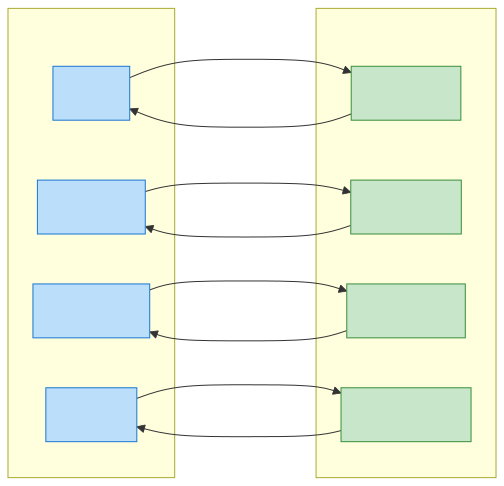

In [ ]:
# @title
mm("""
graph LR
    subgraph Primitives
        int_p["int"]
        double_p["double"]
        boolean_p["boolean"]
        char_p["char"]
    end

    subgraph Wrapper Objects
        Integer_w["Integer"]
        Double_w["Double"]
        Boolean_w["Boolean"]
        Character_w["Character"]
    end

    int_p -->|"Autoboxing<br/>int → Integer"| Integer_w
    Integer_w -->|"Unboxing<br/>Integer → int"| int_p

    double_p -->|"Autoboxing"| Double_w
    Double_w -->|"Unboxing"| double_p

    boolean_p -->|"Autoboxing"| Boolean_w
    Boolean_w -->|"Unboxing"| boolean_p

    char_p -->|"Autoboxing"| Character_w
    Character_w -->|"Unboxing"| char_p

    style int_p fill:#bbdefb,stroke:#1976d2
    style double_p fill:#bbdefb,stroke:#1976d2
    style boolean_p fill:#bbdefb,stroke:#1976d2
    style char_p fill:#bbdefb,stroke:#1976d2
    style Integer_w fill:#c8e6c9,stroke:#388e3c
    style Double_w fill:#c8e6c9,stroke:#388e3c
    style Boolean_w fill:#c8e6c9,stroke:#388e3c
    style Character_w fill:#c8e6c9,stroke:#388e3c""")

### 🚀 Program 2: Droid Inventory System

This program manages an inventory of droids using wrapper classes. It demonstrates `Integer.parseInt()` for converting strings to numbers, autoboxing and unboxing in action, wrapper comparison methods, and type limit constants. The program stores droid data, parses user input from strings, and performs calculations using a mix of primitives and wrapper objects.

In [ ]:
%%writefile DroidInventory.java
import java.util.Scanner;

public class DroidInventory {
    public static void main(String[] args) {
        // Droid data stored as strings (as if read from a file or database)
        String[] droidNames = {"R2-D2", "C-3PO", "BB-8", "K-2SO", "IG-88"};
        String[] powerLevelsStr = {"85", "60", "90", "95", "80"};
        String[] pricesStr = {"7500.50", "5200.00", "8800.75", "12000.00", "9500.25"};

        // Parse strings into wrapper objects using wrapper class methods
        Integer[] powerLevels = new Integer[powerLevelsStr.length];
        Double[] prices = new Double[pricesStr.length];

        for (int i = 0; i < droidNames.length; i++) {
            powerLevels[i] = Integer.parseInt(powerLevelsStr[i]);   // String → int → autoboxed to Integer
            prices[i] = Double.parseDouble(pricesStr[i]);           // String → double → autoboxed to Double
        }

        // Display inventory
        System.out.println("=== Droid Inventory System ===");
        System.out.println("--------------------------------------------");
        System.out.printf("%-10s %12s %12s%n", "Droid", "Power Level", "Price");
        System.out.println("--------------------------------------------");

        double totalValue = 0;  // primitive double
        Integer highestPower = Integer.MIN_VALUE;  // Wrapper — start at minimum
        String strongestDroid = "";

        for (int i = 0; i < droidNames.length; i++) {
            // Unboxing happens automatically in printf and arithmetic
            System.out.printf("%-10s %12d %12.2f%n", droidNames[i], powerLevels[i], prices[i]);

            totalValue += prices[i];  // Double unboxed automatically for addition

            // Using Integer.compare() to find the most powerful droid
            if (Integer.compare(powerLevels[i], highestPower) > 0) {
                highestPower = powerLevels[i];   // Autoboxing
                strongestDroid = droidNames[i];
            }
        }

        System.out.println("--------------------------------------------");
        System.out.printf("Total inventory value: $%.2f%n", totalValue);
        System.out.println("Most powerful droid: " + strongestDroid
                           + " (power level: " + highestPower + ")");

        // Demonstrate that Integer and int work interchangeably
        int avgPower = 0;            // primitive
        for (int i = 0; i < powerLevels.length; i++) {
            avgPower += powerLevels[i];  // Integer unboxed to int for addition
        }
        avgPower /= powerLevels.length;
        System.out.println("Average power level: " + avgPower);

        // Show Integer type limits
        System.out.println();
        System.out.println("Fun fact: Power levels must be between "
                           + Integer.MIN_VALUE + " and " + Integer.MAX_VALUE);
    }
}


Writing DroidInventory.java


In [ ]:
!javac DroidInventory.java
!java DroidInventory

=== Droid Inventory System ===
--------------------------------------------
Droid       Power Level        Price
--------------------------------------------
R2-D2                85      7500.50
C-3PO                60      5200.00
BB-8                 90      8800.75
K-2SO                95     12000.00
IG-88                80      9500.25
--------------------------------------------
Total inventory value: $43001.50
Most powerful droid: K-2SO (power level: 95)
Average power level: 82

Fun fact: Power levels must be between -2147483648 and 2147483647


## 5.5 Nulls — The Dark Side of References

In Java, variables that hold objects (like `String`, `Integer`, or arrays) are actually **reference variables**—they don't contain the object itself, but rather a pointer to where the object lives in memory. The special value `null` means "this reference doesn't point to anything."

Think of a hologram projector on a starship. The projector (the variable) exists and takes up space, but if no hologram is loaded (the value is `null`), then there's nothing to display. The projector isn't broken—it just has nothing to show. But if you try to press "play" on an empty projector, you'll get an error.

### What Can and Can't Be `null`

This is a crucial distinction in Java:

| Type | Can be `null`? | Example |
|------|---------------|--------|
| `String` | ✅ Yes | `String name = null;` |
| `Integer` (wrapper) | ✅ Yes | `Integer count = null;` |
| `int[]` (array) | ✅ Yes | `int[] scores = null;` |
| `int` (primitive) | ❌ No | `int x = null;` → compile error |
| `double` (primitive) | ❌ No | `double d = null;` → compile error |
| `boolean` (primitive) | ❌ No | `boolean b = null;` → compile error |

The rule is simple: **primitives cannot be null; reference types can.** Primitives always have a default value (`0` for numbers, `false` for booleans, `'\0'` for char). Reference types default to `null` if not initialized.

### The Dreaded `NullPointerException`

If you try to use a `null` reference as if it were a real object—calling a method on it, accessing its length, or using it in most operations—Java throws a `NullPointerException` (often abbreviated **NPE**). This is the most common runtime error in Java, and you *will* encounter it.

```java
String pilotName = null;
System.out.println(pilotName.length());  // NullPointerException!
```

Why does this crash? Because `pilotName` doesn't point to any String object, so there's no `length()` method to call. It's like asking "how long is this hologram?" when no hologram is loaded.

Even though we haven't formally studied exceptions yet, the way to *prevent* a `NullPointerException` is straightforward: **check for null before using the variable**.

```java
String pilotName = null;

// Safe: check before using
if (pilotName != null) {
    System.out.println("Pilot: " + pilotName.toUpperCase());
} else {
    System.out.println("No pilot assigned.");
}
```

The `!= null` check should become second nature whenever you're working with a variable that *might* be null—especially method parameters, array elements, and values returned from other methods.

### Null and Wrapper Classes: A Dangerous Combination

Here's where wrappers and nulls create a trap. Since `Integer` is a reference type, it can be `null`. But if Java tries to **unbox** a null wrapper into a primitive, it crashes:

```java
Integer midiChlorians = null;
int count = midiChlorians;  // NullPointerException! Can't unbox null.
```

This is sneaky because the code *looks* like a simple assignment. The lesson: whenever a wrapper variable might be null, check before unboxing.

```java
Integer midiChlorians = null;

if (midiChlorians != null) {
    int count = midiChlorians;  // Safe to unbox
    System.out.println("Count: " + count);
} else {
    System.out.println("No reading available.");
}
```

### Null and Arrays

Arrays are reference types too, so an array variable can be `null`. This is different from an empty array (one that exists but has zero elements):

```java
int[] scores = null;           // No array exists at all
int[] emptyScores = new int[0]; // An array exists, but has 0 elements

// scores.length  → NullPointerException (no array to ask)
// emptyScores.length → 0 (array exists, just empty)
```

When working with arrays that might be null, always check `!= null` before accessing `.length` or any element.

## 5.6 Empty Strings (and Blank Strings)

New programmers often confuse three things that seem similar but are completely different in Java: **null**, **empty**, and **blank** strings. Understanding the distinction is essential for writing robust input handling.

| | `null` | Empty `""` | Blank `"   "` | Normal `"Yoda"` |
|--|--------|-----------|--------------|----------------|
| **What is it?** | No object exists | A String with 0 characters | A String with only whitespace | A String with visible characters |
| **Analogy** | No hologram loaded | Hologram loaded, but invisible | Hologram of empty space | Hologram of Yoda |
| `== null` | `true` | `false` | `false` | `false` |
| `.length()` | 💥 NPE! | `0` | `3` (spaces count) | `4` |
| `.isEmpty()` | 💥 NPE! | `true` | `false` | `false` |
| `.isBlank()` | 💥 NPE! | `true` | `true` | `false` |

Let's break this down:

- `null` means the variable doesn't refer to *any* String object. Calling any method on it crashes.
- An **empty string** `""` is a real String object that happens to contain zero characters. It has a `.length()` of 0.
- A **blank string** `"   "` is a real String object that contains *only* whitespace characters (spaces, tabs, etc.). It has a `.length()` greater than 0, but no visible content.
- A **normal string** has at least one non-whitespace character.

The methods `.isEmpty()` (returns `true` if length is 0) and `.isBlank()` (returns `true` if the string contains only whitespace or is empty) are both available on the String class. Notice that `.isBlank()` is a superset of `.isEmpty()`—every empty string is blank, but not every blank string is empty.

### The Defensive Checking Pattern

When checking whether a string contains usable data, you need to check in the right **order**. The null check *must* come first, because calling `.isEmpty()` or `.isBlank()` on a null reference crashes your program:

```java
// WRONG ORDER — crashes if name is null!
if (name.isEmpty()) {   // NullPointerException if name is null
    System.out.println("Name is empty");
}

// CORRECT ORDER — null check first
if (name == null || name.isBlank()) {
    System.out.println("No valid name provided.");
} else {
    System.out.println("Hello, " + name.trim() + "!");
}
```

This works because of **short-circuit evaluation**: in `name == null || name.isBlank()`, if the left side is `true` (name *is* null), Java skips the right side entirely—so `.isBlank()` never gets called on null. You learned about short-circuit evaluation with `&&` and `||` in a previous chapter; this is a perfect practical application of it.

The `.trim()` method is also useful here—it removes leading and trailing whitespace from a string:

```java
String input = "  Luke  ";
String cleaned = input.trim();  // "Luke" (spaces removed from both ends)
```

A common pattern for processing string input is to trim first, then check if the result is empty:

```java
String userInput = scanner.nextLine().trim();  // Read and trim
if (userInput.isEmpty()) {
    System.out.println("You didn't enter anything!");
}
```

### Graphic: Parsing Strings

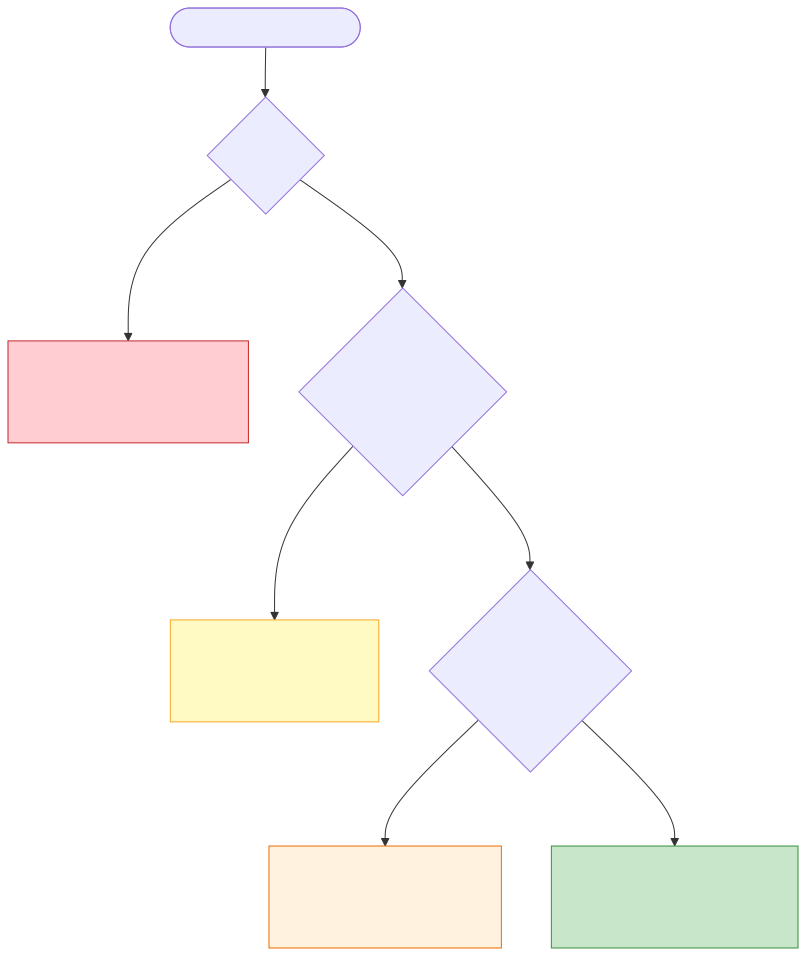

In [ ]:
# @title
mm("""
flowchart TD
    START(["Check a String variable"]) --> NULL{"Is it null?"}
    NULL -->|Yes| NULLRESULT["NULL<br/>No object exists.<br/>Cannot call any methods."]
    NULL -->|No| EMPTY{"Is .isEmpty() true?<br/><i>length == 0</i>"}
    EMPTY -->|Yes| EMPTYRESULT["EMPTY STRING<br/>Object exists but has<br/>zero characters."]
    EMPTY -->|No| BLANK{"Is .isBlank() true?<br/><i>only whitespace</i>"}
    BLANK -->|Yes| BLANKRESULT["BLANK STRING<br/>Has characters, but only<br/>spaces/tabs/newlines."]
    BLANK -->|No| VALID["VALID STRING<br/>Contains at least one<br/>non-whitespace character."]

    style NULLRESULT fill:#ffcdd2,stroke:#c62828
    style EMPTYRESULT fill:#fff9c4,stroke:#f9a825
    style BLANKRESULT fill:#fff3e0,stroke:#ef6c00
    style VALID fill:#c8e6c9,stroke:#388e3c""")

### 📝 Problem 2: Jedi Name Validator

In the Jedi Order, each Jedi has an official registered name consisting of a first name and a last name. Write a program that validates name input. Your program should:

1. Store a first name and last name in `String` variables (test with various values—see below)
2. Write a **static method** called `validateName` that takes a `String` parameter and returns a `String`:
   - If the input is `null`, return `"ERROR: Name is null"`
   - If the input is empty (after trimming), return `"ERROR: Name is empty"`
   - If the input is blank (only whitespace, after trimming), return `"ERROR: Name is blank"`
   - Otherwise, return the trimmed name
3. Use `validateName` on both the first and last name
4. If both names are valid, print the full Jedi name in the format `"Jedi: LASTNAME, Firstname"` (last name uppercase, first name with only the first letter capitalized)
5. If either name is invalid, print the error message(s)

Test your program with these cases:
- `"Luke"` and `"Skywalker"` → should produce `"Jedi: SKYWALKER, Luke"`
- `null` and `"Kenobi"` → should print the null error for the first name
- `"  "` and `""` → should print errors for both (blank and empty)

**Hint:** To capitalize only the first letter: `name.substring(0,1).toUpperCase() + name.substring(1).toLowerCase()`

In [ ]:
%%writefile JediNameValidator.java
// YOUR CODE HERE
// Write the JediNameValidator program as described above.


In [ ]:
!javac JediNameValidator.java
!java JediNameValidator

## 5.7 Input Validation

You now have the building blocks—casting, null checks, empty string detection—to tackle one of the most important practical skills in programming: **input validation**. This means making sure user input is acceptable before your program tries to use it.

Consider what happens when a program asks "Enter your age:" and the user types "Wookiee". If your code calls `scanner.nextInt()`, it will crash with an `InputMismatchException`. Or what if the user enters `-5` or `9999`? Technically those are valid integers, but they're not valid ages.

Good input validation handles three things:

1. **Type checking** — Is the input the right type? (e.g., a number, not text)
2. **Range checking** — Is the value within acceptable bounds?
3. **Format checking** — Is a string non-null, non-empty, and properly formatted?

Since we haven't learned exception handling (`try`/`catch`) yet, we'll use **loop-based validation** with `Scanner` methods that *check* input before trying to read it.

### Validating Numeric Input with `hasNext` Methods

The `Scanner` class has methods that check whether the next token of input is a particular type *without actually reading it*:

| Method | Returns `true` if... |
|--------|---------------------|
| `scanner.hasNextInt()` | Next token is a valid `int` |
| `scanner.hasNextDouble()` | Next token is a valid `double` |
| `scanner.hasNextLong()` | Next token is a valid `long` |
| `scanner.hasNextBoolean()` | Next token is `true` or `false` |
| `scanner.hasNext()` | There is any next token at all |

The pattern for validation is: use a `while` loop that keeps asking until valid input is received.

```java
Scanner scanner = new Scanner(System.in);

System.out.print("Enter a number: ");
while (!scanner.hasNextInt()) {
    String bad = scanner.next();  // Consume the invalid input
    System.out.print("'" + bad + "' is not a number. Try again: ");
}
int number = scanner.nextInt();  // Safe to read — we know it's valid
```

Let's walk through what happens step by step:

1. The program prints "Enter a number: " and waits.
2. The user types `"hello"` and presses Enter.
3. `hasNextInt()` checks if "hello" is a valid integer — it's not, so it returns `false`.
4. `!false` is `true`, so we enter the loop.
5. `scanner.next()` reads and **discards** "hello" (this is critical — without it, the loop would check the same bad input forever).
6. The program prints the error message and waits again.
7. The user types `"42"`.
8. `hasNextInt()` returns `true` for "42".
9. `!true` is `false`, so we exit the loop.
10. `scanner.nextInt()` reads `42` — we're guaranteed it's valid.

### Range Validation

Once you've confirmed the input is the right *type*, you often need to check that it falls within an acceptable *range*. You can combine type validation and range validation in one loop:

```java
int choice = 0;
boolean valid = false;

while (!valid) {
    System.out.print("Choose a menu option (1-4): ");
    if (scanner.hasNextInt()) {
        choice = scanner.nextInt();
        if (choice >= 1 && choice <= 4) {
            valid = true;  // Both type AND range are good
        } else {
            System.out.println("Please enter a number between 1 and 4.");
        }
    } else {
        System.out.println("That's not a number! Try again.");
        scanner.next();  // Discard bad input
    }
}
```

This approach handles both "Wookiee" (wrong type) and "99" (wrong range) gracefully.

### Validating String Input

For string input, combine the null and empty/blank checks from the previous sections:

```java
String name = "";
while (name.isBlank()) {
    System.out.print("Enter your name: ");
    name = scanner.nextLine().trim();
    if (name.isBlank()) {
        System.out.println("Name cannot be empty or blank. Try again.");
    }
}
```

Note: `scanner.nextLine()` will never return `null` (it returns an empty string if the user just presses Enter), so we don't need a null check here. However, if you're receiving strings from other sources (method parameters, arrays, files), always include the null check.

### 🚀 Program 3: Cantina Ordering System

This program simulates the Mos Eisley Cantina ordering counter. The user selects a drink from a menu, enters a quantity, and gets a total. Every piece of input is validated: the menu choice must be 1–4, the quantity must be a positive integer, and the customer name can't be blank. This program synthesizes casting (for price calculations), null/empty checks (for the name), and loop-based numeric validation.

In [ ]:
%%writefile CantinaOrder.java
import java.util.Scanner;

public class CantinaOrder {
    public static void main(String[] args) {
        Scanner scanner = new Scanner(System.in);

        // Menu items and prices
        String[] drinks = {"Blue Milk", "Jawa Juice", "Corellian Ale", "Tatooine Tea"};
        double[] prices = {3.50, 5.75, 8.00, 2.25};

        System.out.println("==================================");
        System.out.println("  Welcome to the Mos Eisley Cantina!");
        System.out.println("==================================");

        // --- Validate customer name (string validation) ---
        String customerName = "";
        while (customerName.isBlank()) {
            System.out.print("Enter your name: ");
            customerName = scanner.nextLine().trim();
            if (customerName.isBlank()) {
                System.out.println("  Name cannot be blank. Try again.");
            }
        }

        // --- Display menu ---
        System.out.println();
        System.out.println("--- Drink Menu ---");
        for (int i = 0; i < drinks.length; i++) {
            System.out.printf("  %d. %-20s $%.2f%n", (i + 1), drinks[i], prices[i]);
        }
        System.out.println();

        // --- Validate menu choice (type + range validation) ---
        int choice = 0;
        boolean validChoice = false;
        while (!validChoice) {
            System.out.print("Choose a drink (1-" + drinks.length + "): ");
            if (scanner.hasNextInt()) {
                choice = scanner.nextInt();
                if (choice >= 1 && choice <= drinks.length) {
                    validChoice = true;
                } else {
                    System.out.println("  Please enter a number between 1 and " + drinks.length + ".");
                }
            } else {
                System.out.println("  '" + scanner.next() + "' is not a valid number.");
            }
        }

        // --- Validate quantity (type + range validation) ---
        int quantity = 0;
        boolean validQuantity = false;
        while (!validQuantity) {
            System.out.print("How many? (1-10): ");
            if (scanner.hasNextInt()) {
                quantity = scanner.nextInt();
                if (quantity >= 1 && quantity <= 10) {
                    validQuantity = true;
                } else {
                    System.out.println("  Please order between 1 and 10 drinks.");
                }
            } else {
                System.out.println("  '" + scanner.next() + "' is not a valid number.");
            }
        }

        // --- Calculate total (casting and rounding) ---
        String drinkName = drinks[choice - 1];  // Convert 1-based to 0-based
        double unitPrice = prices[choice - 1];
        double subtotal = unitPrice * quantity;  // int quantity widened to double
        double tax = subtotal * 0.08;
        double total = subtotal + tax;

        // Round to 2 decimal places
        total = Math.round(total * 100.0) / 100.0;
        tax = Math.round(tax * 100.0) / 100.0;

        // --- Print receipt ---
        System.out.println();
        System.out.println("==================================");
        System.out.println("  MOS EISLEY CANTINA - RECEIPT");
        System.out.println("==================================");
        System.out.println("Customer: " + customerName);
        System.out.printf("%dx %s @ $%.2f each%n", quantity, drinkName, unitPrice);
        System.out.printf("Subtotal: $%.2f%n", subtotal);
        System.out.printf("Tax (8%%): $%.2f%n", tax);
        System.out.println("----------------------------------");
        System.out.printf("TOTAL:    $%.2f%n", total);
        System.out.println("==================================");
        System.out.println("May the Force be with you!");

        scanner.close();
    }
}


Writing CantinaOrder.java


In [ ]:
!javac CantinaOrder.java
# !java CantinaOrder # Uncomment to run

### 📝 Problem 3: Hyperspace Navigation

You're writing the navigation system for a starship. The system needs three pieces of information from the pilot: an X coordinate, a Y coordinate, and a destination name. Write a program that:

1. Asks the user for a destination name (must not be blank — keep asking until valid)
2. Asks the user for an X coordinate (must be a valid `double` between -1000.0 and 1000.0 — validate both type and range)
3. Asks the user for a Y coordinate (same validation as X)
4. Calculates the distance from the origin using the distance formula: `Math.sqrt(x*x + y*y)`
5. Prints a formatted navigation summary that includes:
   - Destination name
   - Coordinates rounded to 2 decimal places
   - Distance rounded to 2 decimal places
   - An estimated travel time (distance divided by a speed of 10.0 units/hour, rounded to 1 decimal place)

**Hints:**
- For double validation, use `scanner.hasNextDouble()`
- Remember to consume bad input with `scanner.next()` in the validation loop
- Watch out for the `nextLine()` / `nextDouble()` interaction: after reading a double with `nextDouble()`, the newline character is still in the buffer. If you need to read a line afterward, call `scanner.nextLine()` once to consume it. (In this problem, read the name *first* to avoid this issue.)

Example output:
```
=== Hyperspace Navigation System ===
Destination: Alderaan
Coordinates: (150.75, -320.50)
Distance from origin: 354.17 units
Estimated travel time: 35.4 hours
Coordinates locked. Prepare for hyperspace!
```

In [ ]:
%%writefile HyperspaceNav.java
// YOUR CODE HERE
// Write the HyperspaceNav program as described above.


In [ ]:
!javac HyperspaceNav.java
!java HyperspaceNav

## 5.8 Enhanced For Loops (For-Each)

You've been using the standard `for` loop to iterate over arrays:

```java
String[] jedis = {"Luke", "Leia", "Rey", "Obi-Wan"};
for (int i = 0; i < jedis.length; i++) {
    System.out.println(jedis[i]);
}
```

This works perfectly, but it's a lot of boilerplate for a simple task: "go through every element and do something with it." You have to manage the index variable `i`, remember to use `.length`, and use `jedis[i]` to access each element. If any of those details are wrong (off-by-one error, wrong variable name, etc.), you get a bug.

Java provides a cleaner alternative called the **enhanced for loop** (also known as the **for-each loop**):

```java
String[] jedis = {"Luke", "Leia", "Rey", "Obi-Wan"};
for (String jedi : jedis) {
    System.out.println(jedi);
}
```

Read the `:` as **"in"**: "for each String `jedi` **in** `jedis`, do this." Instead of telling Java *how* to iterate (manage an index, check bounds, look up each element), you're telling it *what* to iterate over. Java handles the rest.

Think of it this way: with a standard for loop, you're telling the droid "go to hangar bay 1, inspect the ship, then go to bay 2, inspect the ship, then bay 3..." With the enhanced for loop, you're saying "inspect each ship in the hangar." Same result, fewer instructions, fewer chances for error.

### Syntax Breakdown

```java
for (ElementType variableName : arrayOrCollection) {
    // Use variableName — it holds the current element
}
```

- **`ElementType`**: The type of elements in the array (must match the array's element type)
- **`variableName`**: A new variable that holds the *current element* on each iteration
- **`arrayOrCollection`**: The array (or collection—you'll learn about those later) to iterate over

Here are more examples:

```java
// With ints
int[] scores = {95, 87, 92, 78, 100};
int total = 0;
for (int score : scores) {
    total += score;
}
System.out.println("Average: " + (double) total / scores.length);

// With doubles
double[] distances = {12.5, 3.7, 8.0, 15.2};
double max = distances[0];
for (double dist : distances) {
    if (dist > max) {
        max = dist;
    }
}
System.out.println("Farthest: " + max + " parsecs");
```

### When to Use Each Type of For Loop

The enhanced for loop is great, but it's not always the right choice. Here's a comparison:

| Situation | Standard `for` | Enhanced `for` |
|-----------|----------------|----------------|
| Visit every element | ✅ Works | ✅ **Preferred** (cleaner) |
| Need the index number | ✅ **Required** | ❌ No access to index |
| Modify array elements | ✅ Can do `arr[i] = newValue` | ❌ Can't modify the array |
| Skip elements / go backwards | ✅ Full control | ❌ Always forward, every element |
| Iterate over two arrays in parallel | ✅ Use same index `i` | ❌ Only one array at a time |

**Key limitation:** The loop variable in an enhanced for loop is a **copy** of the array element, not a reference to it. Assigning a new value to the loop variable does *not* change the original array:

```java
int[] scores = {90, 80, 70};

// This does NOT modify the array!
for (int score : scores) {
    score = score + 10;  // Only changes the local copy
}
// scores is still {90, 80, 70}

// To modify, use a standard for loop:
for (int i = 0; i < scores.length; i++) {
    scores[i] = scores[i] + 10;  // This DOES modify the array
}
// scores is now {100, 90, 80}
```

**Rule of thumb:** If you just need to *read* every element, use the enhanced for loop. If you need to *change* elements, *know the position*, or do anything fancy with indices, use the standard for loop.

## 5.9 Two-Dimensional Arrays

So far, your arrays have been one-dimensional—a single row of values, like a list. But many kinds of data are naturally organized as a **grid** with rows and columns: a game board, a spreadsheet, a seating chart, a pixel image, or a star map.

A **two-dimensional (2D) array** is an array of arrays. Each element of the outer array is itself an array, creating a grid-like structure.

Think of a star map divided into sectors. The map has rows (numbered 0, 1, 2...) and columns (numbered 0, 1, 2...), and each cell in the grid contains information about that sector—whether there's a planet, a star, empty space, or a ship.

### Declaring and Creating 2D Arrays

```java
// Method 1: Declare the type and size, fill in later
int[][] grid = new int[3][4];  // 3 rows, 4 columns (all zeros initially)

// Method 2: Initialize with values directly
int[][] scores = {
    {90, 85, 92},    // Row 0
    {78, 88, 95},    // Row 1
    {84, 91, 87}     // Row 2
};

// Method 3: With chars (great for game boards and maps)
char[][] starMap = {
    {'.', '*', '.', 'P'},
    {'.', '.', 'S', '.'},
    {'P', '.', '.', '*'}
};
```

The double brackets `[][]` tell Java this is a 2D array. The first dimension is the **row** count, and the second is the **column** count. In `new int[3][4]`, you get 3 rows and 4 columns, for a total of 12 elements.

### Accessing and Modifying Elements

To access a specific element, use two indices: `array[row][col]`.

```java
int[][] scores = {
    {90, 85, 92},
    {78, 88, 95},
    {84, 91, 87}
};

int value = scores[1][2];  // Row 1, Column 2 → 95
scores[0][1] = 100;         // Change row 0, column 1 from 85 to 100
```

Getting the dimensions:

```java
int numRows = scores.length;       // 3 (number of rows)
int numCols = scores[0].length;    // 3 (number of columns in first row)
```

Notice that `scores.length` gives you the number of **rows** (the outer array's length), while `scores[0].length` gives you the number of **columns** in the first row. In a standard rectangular 2D array, every row has the same number of columns.

**Watch your indices!** Just like with 1D arrays, going out of bounds throws an `ArrayIndexOutOfBoundsException`. In a 3×4 grid, valid row indices are 0–2 and valid column indices are 0–3.

### Looping Through 2D Arrays

To visit every element in a 2D array, you need **nested loops**: an outer loop for rows and an inner loop for columns.

**Standard nested for loops** (use when you need the indices):

```java
int[][] grid = {
    {1, 2, 3},
    {4, 5, 6},
    {7, 8, 9}
};

for (int row = 0; row < grid.length; row++) {
    for (int col = 0; col < grid[row].length; col++) {
        System.out.print(grid[row][col] + " ");
    }
    System.out.println();  // New line after each row
}
```

Output:
```
1 2 3
4 5 6
7 8 9
```

**Enhanced for loops** (use when you just need the values):

```java
for (int[] row : grid) {        // Each "row" is a 1D array
    for (int value : row) {     // Each "value" is an element in that row
        System.out.print(value + " ");
    }
    System.out.println();
}
```

Both produce the same output. Notice that in the enhanced for loop version, the outer loop variable `row` has type `int[]` (a 1D array), because each element of a 2D array is itself an array. Then the inner loop iterates over that 1D array.

### Common 2D Array Operations

Here are some patterns you'll use frequently:

```java
// Sum all elements
int total = 0;
for (int[] row : grid) {
    for (int val : row) {
        total += val;
    }
}

// Sum a specific row
int rowSum = 0;
for (int val : grid[1]) {  // Sum of row index 1
    rowSum += val;
}

// Sum a specific column (need standard for loop)
int colSum = 0;
for (int row = 0; row < grid.length; row++) {
    colSum += grid[row][2];  // Sum of column index 2
}
```

### Ragged Arrays (Brief Note)

In Java, 2D arrays don't *have* to be rectangular. Each row can have a different number of columns—this is called a **ragged array**:

```java
int[][] ragged = {
    {1, 2, 3},
    {4, 5},
    {6, 7, 8, 9}
};
// ragged[0].length is 3
// ragged[1].length is 2
// ragged[2].length is 4
```

Ragged arrays are uncommon in practice, but they're the reason you should use `grid[row].length` instead of `grid[0].length` in your inner loop—it works correctly even if rows have different lengths. For this course, we'll mostly work with regular rectangular 2D arrays.

### 🚀 Program 4: Star Map Navigator

This program creates a 2D `char` array representing a sector of space. It places stars, planets, and a ship on the map, then lets the user move the ship around using validated input. The program demonstrates 2D array creation, element access and modification, nested enhanced for loops for display, standard for loops for searching, and input validation for movement commands.

In [ ]:
%%writefile StarMap.java
import java.util.Scanner;

public class StarMap {

    // Display the star map using enhanced for loops
    public static void displayMap(char[][] map) {
        System.out.println();
        // Print column headers
        System.out.print("  ");
        for (int c = 0; c < map[0].length; c++) {
            System.out.print(c + " ");
        }
        System.out.println();

        int rowNum = 0;
        for (char[] row : map) {
            System.out.print(rowNum + " ");
            for (char cell : row) {
                System.out.print(cell + " ");
            }
            System.out.println();
            rowNum++;
        }
        System.out.println();
        System.out.println("Legend: S=Ship  P=Planet  *=Star  .=Empty");
    }

    // Find the ship's current position (returns {row, col})
    public static int[] findShip(char[][] map) {
        for (int r = 0; r < map.length; r++) {
            for (int c = 0; c < map[r].length; c++) {
                if (map[r][c] == 'S') {
                    return new int[]{r, c};
                }
            }
        }
        return null;  // Ship not found (shouldn't happen)
    }

    // Count objects on the map using enhanced for loops
    public static void printMapStats(char[][] map) {
        int planets = 0, stars = 0, empty = 0;
        for (char[] row : map) {
            for (char cell : row) {
                if (cell == 'P') planets++;
                else if (cell == '*') stars++;
                else if (cell == '.') empty++;
            }
        }
        System.out.println("Map size: " + map.length + " x " + map[0].length);
        System.out.println("Planets: " + planets + "  Stars: " + stars + "  Empty: " + empty);
    }

    public static void main(String[] args) {
        Scanner scanner = new Scanner(System.in);

        // Initialize the star map (6 rows x 8 columns)
        char[][] map = {
            {'.', '.', '*', '.', '.', 'P', '.', '.'},
            {'.', '.', '.', '.', '*', '.', '.', '.'},
            {'P', '.', '.', '.', '.', '.', '*', '.'},
            {'.', '.', '*', '.', '.', '.', '.', 'P'},
            {'.', '.', '.', 'P', '.', '.', '.', '.'},
            {'.', 'S', '.', '.', '.', '*', '.', '.'}
        };

        System.out.println("=== Star Map Navigator ===");
        printMapStats(map);
        displayMap(map);

        // Game loop: 5 moves
        int movesLeft = 5;
        while (movesLeft > 0) {
            System.out.println("Moves remaining: " + movesLeft);

            // Validate direction input
            String direction = "";
            boolean validDir = false;
            while (!validDir) {
                System.out.print("Enter direction (W=up, S=down, A=left, D=right, Q=quit): ");
                direction = scanner.nextLine().trim().toUpperCase();
                if (direction.equals("W") || direction.equals("S") ||
                    direction.equals("A") || direction.equals("D") || direction.equals("Q")) {
                    validDir = true;
                } else if (direction.isBlank()) {
                    System.out.println("  Please enter a direction.");
                } else {
                    System.out.println("  '" + direction + "' is not valid. Use W/A/S/D or Q.");
                }
            }

            if (direction.equals("Q")) {
                System.out.println("Navigation ended.");
                break;
            }

            // Find current ship position
            int[] pos = findShip(map);
            if (pos == null) {   // Null check!
                System.out.println("Error: Ship not found on map!");
                break;
            }

            int newRow = pos[0];
            int newCol = pos[1];

            // Calculate new position
            if (direction.equals("W")) newRow--;
            else if (direction.equals("S")) newRow++;
            else if (direction.equals("A")) newCol--;
            else if (direction.equals("D")) newCol++;

            // Bounds checking (range validation on the 2D array)
            if (newRow < 0 || newRow >= map.length || newCol < 0 || newCol >= map[0].length) {
                System.out.println("  Can't move there — edge of the map!");
                continue;  // Don't consume a move
            }

            // Check what's at the new position
            char destination = map[newRow][newCol];
            if (destination == 'P') {
                System.out.println("  You discovered a planet!");
            } else if (destination == '*') {
                System.out.println("  You flew past a star!");
            }

            // Move the ship
            map[pos[0]][pos[1]] = '.';   // Clear old position
            map[newRow][newCol] = 'S';    // Place ship at new position
            movesLeft--;

            displayMap(map);
        }

        System.out.println("Final map:");
        displayMap(map);
        System.out.println("May the Force be with you, pilot.");

        scanner.close();
    }
}


Writing StarMap.java


In [ ]:
!javac StarMap.java
# !java StarMap # Uncomment to run

=== Star Map Navigator ===
Map size: 6 x 8
Planets: 4  Stars: 5  Empty: 38

  0 1 2 3 4 5 6 7 
0 . . * . . P . . 
1 . . . . * . . . 
2 P . . . . . * . 
3 . . * . . . . P 
4 . . . P . . . . 
5 . S . . . * . . 

Legend: S=Ship  P=Planet  *=Star  .=Empty
Moves remaining: 5
Enter direction (W=up, S=down, A=left, D=right, Q=quit): 
  0 1 2 3 4 5 6 7 
0 . . * . . P . . 
1 . . . . * . . . 
2 P . . . . . * . 
3 . . * . . . . P 
4 . S . P . . . . 
5 . . . . . * . . 

Legend: S=Ship  P=Planet  *=Star  .=Empty
Moves remaining: 4
Enter direction (W=up, S=down, A=left, D=right, Q=quit): 
  0 1 2 3 4 5 6 7 
0 . . * . . P . . 
1 . . . . * . . . 
2 P . . . . . * . 
3 . S * . . . . P 
4 . . . P . . . . 
5 . . . . . * . . 

Legend: S=Ship  P=Planet  *=Star  .=Empty
Moves remaining: 3
Enter direction (W=up, S=down, A=left, D=right, Q=quit):   You flew past a star!

  0 1 2 3 4 5 6 7 
0 . . * . . P . . 
1 . . . . * . . . 
2 P . . . . . * . 
3 . . S . . . . P 
4 . . . P . . . . 
5 . . . . . * . . 

Legend:

### 📝 Problem 4: Galactic Scoreboard

The Galactic Podracing League has 4 racers competing across 3 rounds. Write a program that:

1. Creates a 2D `int` array with 4 rows (racers) and 3 columns (rounds)
2. Stores the racer names in a separate `String` array: `{"Anakin", "Sebulba", "Gasgano", "Mawhonic"}`
3. Fills the score array with pre-set values (you can hardcode them as an initializer list):
   - Anakin: 85, 92, 98
   - Sebulba: 90, 78, 88
   - Gasgano: 72, 85, 80
   - Mawhonic: 68, 75, 70
4. Using **enhanced for loops** where possible and standard for loops where necessary, calculate and display:
   - A formatted table showing all scores with racer names and round headers
   - The total score for each racer (sum of their row)
   - The average score for each round (average of each column), rounded to 1 decimal place
   - The overall highest single score, and which racer/round it occurred in

Expected output format:
```
=== Galactic Podracing Scoreboard ===
              Round 1  Round 2  Round 3  |  Total
Anakin            85       92       98   |    275
Sebulba           90       78       88   |    256
Gasgano           72       85       80   |    237
Mawhonic          68       75       70   |    213
-----------------------------------------------
Round Avg:      78.8     82.5     84.0

Highest score: 98 by Anakin in Round 3
```

**Hints:**
- To find the highest score and its location, you'll need the standard for loop (you need the indices)
- Use `System.out.printf()` with `%8d` or `%-10s` for aligned columns
- For the round averages, cast the sum to `double` before dividing

In [ ]:
%%writefile GalacticScoreboard.java
// YOUR CODE HERE
// Write the GalacticScoreboard program as described above.


In [ ]:
!javac GalacticScoreboard.java
!java GalacticScoreboard

## Common Mistakes

Watch out for these frequent errors when working with the topics in this chapter:

| Mistake | What Happens | Fix |
|---------|--------------|-----|
| Forgetting to `import` | `error: cannot find symbol` | Add `import java.util.Scanner;` (etc.) at top of file |
| Casting `double` to `int` and expecting rounding | `(int) 3.9` gives `3`, not `4` | Use `Math.round()` for proper rounding |
| `Math.round()` returns `long`, not `int` | Type mismatch error | Cast the result: `(int) Math.round(x)` |
| Integer overflow with no warning | Silently wrong results (wraps around) | Use `long` for large values, or check before calculating |
| Calling a method on `null` | `NullPointerException` | Always check `!= null` before using reference variables |
| Checking `.isEmpty()` before checking `null` | `NullPointerException` on the `.isEmpty()` call | Put the null check first: `if (s == null \|\| s.isEmpty())` |
| Confusing `""` (empty) with `null` | Logic errors — they're completely different | Remember: `null` = no object; `""` = object with 0 characters |
| Unboxing a `null` wrapper | `NullPointerException` | Check `!= null` before assigning `Integer` to `int` |
| Not consuming bad `Scanner` input | Infinite loop (keeps checking the same bad input) | Call `scanner.next()` inside the validation loop to discard it |
| Using enhanced for to modify array elements | Array unchanged (loop variable is a copy) | Use standard `for` with index to modify elements |
| `array.length` on a 2D array | Gives number of rows, not total elements | Use `array[0].length` for columns |
| Off-by-one in 2D array access | `ArrayIndexOutOfBoundsException` | Rows: 0 to `length-1`; Cols: 0 to `row.length-1` |

## Summary

Congratulations! You've leveled up your Java skills significantly. This chapter covered a lot of ground—all focused on making your code more **robust** (handling the unexpected) and more **capable** (working with complex data). Let's recap the key ideas.

### Key Takeaways

1. **Packages organize Java's vast library** — Use `import` statements to access classes outside of `java.lang`. Specific imports (`import java.util.Scanner`) are preferred over wildcards.

2. **Casting converts between types** — Widening (small → large) is automatic; narrowing (large → small) requires an explicit cast like `(int)` and **truncates** rather than rounds.

3. **`Math.round()`, `.floor()`, `.ceil()` give you control over rounding** — Use these instead of casting when you want predictable rounding behavior.

4. **Integer overflow wraps silently** — Adding 1 to `Integer.MAX_VALUE` gives you `Integer.MIN_VALUE` with no error. Use `long` for large values and check before calculating.

5. **Wrapper classes bridge primitives and objects** — `Integer`, `Double`, etc. provide useful methods like `parseInt()` and enable features that require objects. Autoboxing and unboxing happen automatically.

6. **`null` means "no object"** — Only reference types can be null. Always check `!= null` before calling methods on a variable that might be null.

7. **Null, empty, and blank are three different things** — Check in order: null first, then empty/blank. Use `.trim()` to clean up whitespace.

8. **Validate input with loops** — Use `hasNextInt()` / `hasNextDouble()` to check type, then check range, and always consume bad input with `scanner.next()`.

9. **Enhanced for loops simplify iteration** — `for (Type x : array)` reads every element cleanly, but use standard for loops when you need the index or need to modify elements.

10. **2D arrays model grids and tables** — Access with `array[row][col]`, iterate with nested loops, and remember `.length` gives rows while `[0].length` gives columns.

## Review: Loop of the Recursive Dragon
https://brendanpshea.github.io/LotRD/?set=java_05_cast_null_import.json

## Code Jumbler: Chapter 5
https://brendanpshea.github.io/code_jumbler/?problemSet=jumble_05.json

## Glossary

| Term | Definition |
|------|------------|
| **Package** | A named group of related Java classes (e.g., `java.util`) |
| **Import** | A statement that tells the compiler where to find a class: `import java.util.Scanner;` |
| **Static Import** | An import that lets you use static methods/fields without the class name |
| **Widening Cast** | Automatic conversion from a smaller type to a larger type (e.g., `int` → `double`) |
| **Narrowing Cast** | Explicit conversion from a larger type to a smaller type (e.g., `(int) 3.14`) |
| **Truncation** | Chopping off the decimal part without rounding (what casting does) |
| **`Math.round()`** | Returns the nearest whole number (as `long`) — proper rounding |
| **`Math.floor()`** | Returns the largest integer ≤ the value (always rounds down) |
| **`Math.ceil()`** | Returns the smallest integer ≥ the value (always rounds up) |
| **Overflow** | When a calculation exceeds a type's max value and wraps around |
| **Wrapper Class** | An object version of a primitive type (e.g., `Integer` for `int`) |
| **Autoboxing** | Automatic conversion of a primitive to its wrapper type |
| **Unboxing** | Automatic conversion of a wrapper to its primitive type |
| **`null`** | A special value meaning "no object" — only for reference types |
| **`NullPointerException`** | Runtime error caused by calling a method on a `null` reference |
| **Empty String** | A String with zero characters (`""`) — an object exists but has no content |
| **Blank String** | A String containing only whitespace characters (`"   "`) |
| **`.isEmpty()`** | String method returning `true` if length is 0 |
| **`.isBlank()`** | String method returning `true` if string is empty or only whitespace |
| **`.trim()`** | String method that removes leading and trailing whitespace |
| **Input Validation** | Checking that user input is the correct type, range, and format before using it |
| **`hasNextInt()`** | Scanner method that checks if the next token is a valid integer (without reading it) |
| **Enhanced For Loop** | `for (Type x : array)` — iterates over every element without managing an index |
| **2D Array** | An array of arrays, forming a grid with rows and columns |
| **Ragged Array** | A 2D array where rows can have different numbers of columns |